In [57]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# 设置支持中文的字体（例如 PingFang SC，macOS 默认字体之一）
# 或者使用 'Heiti TC', 'Songti SC'
plt.rcParams['font.sans-serif'] = ['PingFang SC']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方框的问题

csv_path = './data/val.csv'
df = pd.read_csv(csv_path)

# 统计 content 列的文本长度
content_lengths = df['content'].apply(len)
content_lengths.describe()

count    186875.000000
mean        504.497835
std         471.054650
min          31.000000
25%         135.000000
50%         333.000000
75%         721.000000
max        2046.000000
Name: content, dtype: float64

In [1]:
import pandas as pd

versions = ['milvus.bow.v5_1', 'milvus.bow.v5_2', 'milvus.bow.v5_3']
for version in versions:
    csv_path = f'./性能测试结果/title/{version}.csv'
    df = pd.read_csv(csv_path)
    df['rank'] = 1 / df['rank']
    print(f'MRR {version}', df['rank'].mean())

MRR milvus.bow.v5_1 0.06033286031746032
MRR milvus.bow.v5_2 0.13648126190476192
MRR milvus.bow.v5_3 0.19908456984126985


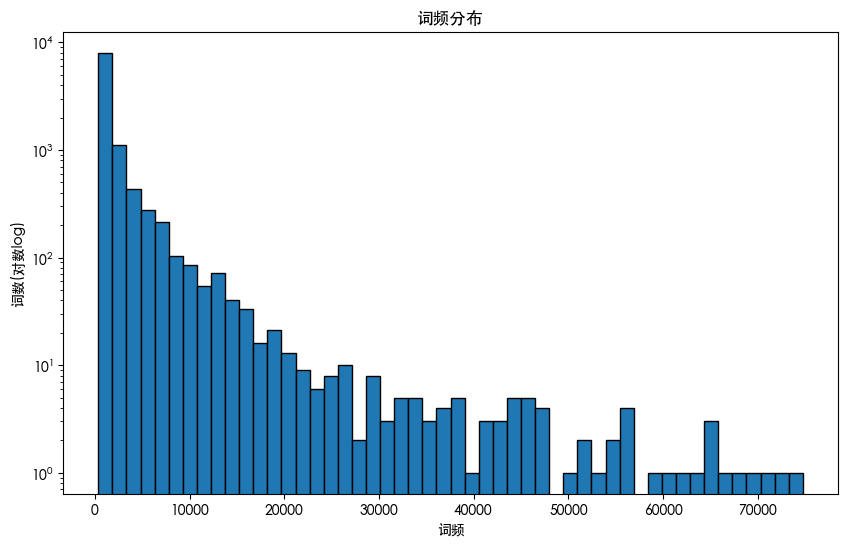

In [1]:
from utils.common import load_txt_file
import pandas as pd
import matplotlib.pyplot as plt

# 设置支持中文的字体（例如 PingFang SC，macOS 默认字体之一）
# 或者使用 'Heiti TC', 'Songti SC'
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方框的问题


def load_stop_words():
    stop_words = set()
    for path in ["stopwords/baidu_stopwords.txt", "stopwords/hit_stopwords.txt"]:
        stop_words.update(load_txt_file(path))
    return list(stop_words)


stop_words = load_stop_words()
min_freq = 350
word_freq = {
    "words": [],
    "freq": []
}
word_to_freq = {}


def load_vocab_from_txt():
    with open('./data/vocab_val.txt', 'r') as f:
        for line in f:
            if line.strip() == '':
                continue

            word, freq = line.rsplit(' ', 1)  # 避免空格词汇被错误分割
            if word in stop_words:
                continue

            if int(freq) >= min_freq:
                word_freq["words"].append(word)
                word_freq["freq"].append(int(freq))
                word_to_freq[word] = int(freq)
            else:
                break


load_vocab_from_txt()
df = pd.DataFrame(word_freq)

# 使用 histogram 绘制词频分布
plt.figure(figsize=(10, 6))
plt.hist(df["freq"][20:], bins=50, log=True, edgecolor='black')
plt.xlabel('词频')
plt.title('词频分布')
plt.ylabel('词数(对数log)')
plt.show()

In [6]:
df[:10]

,words,freq
0,,2376939
1,,2086920
2,月,179089
3,日,134517
4,年,123121
5,中,114221
6,上,111630
7,都,108072
8,系列,105421
9,不,105190


  words     freq
0       2376939
1        2086920
2     月   179089
3     日   134517
4     年   123121
5     中   114221
6     上   111630
7     都   108072
8    系列   105421
9     不   105190


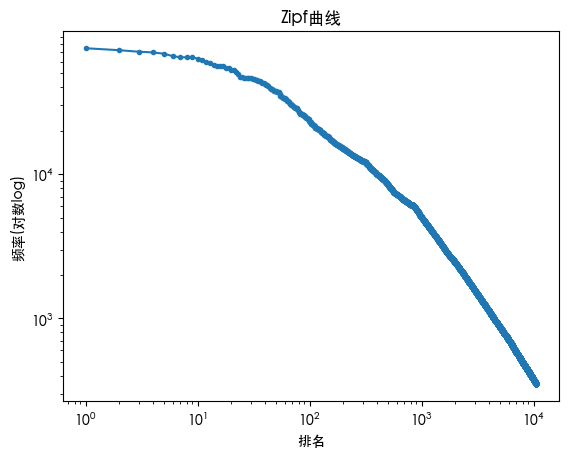

In [65]:
sorted_freq = word_freq["freq"][20:]
ranks = range(1, len(sorted_freq) + 1)

print(df[:10])

plt.loglog(ranks, sorted_freq, marker='.')
plt.xlabel('排名')
plt.ylabel('频率(对数log)')
plt.title('Zipf曲线')
plt.show()

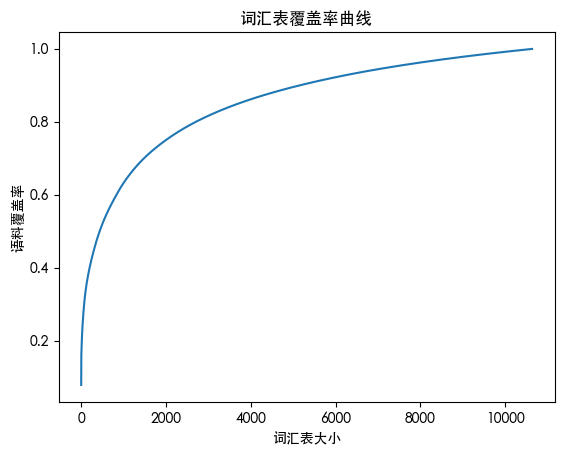

In [66]:
total_words = sum(word_freq['freq'])
cumulative_coverage = [sum(word_freq["freq"][:i+1]) /
                       total_words for i in range(len(word_freq["freq"]))]

plt.plot(range(1, len(cumulative_coverage) + 1), cumulative_coverage)
plt.xlabel('词汇表大小')
plt.ylabel('语料覆盖率')
plt.title('词汇表覆盖率曲线')
plt.show()

29533158


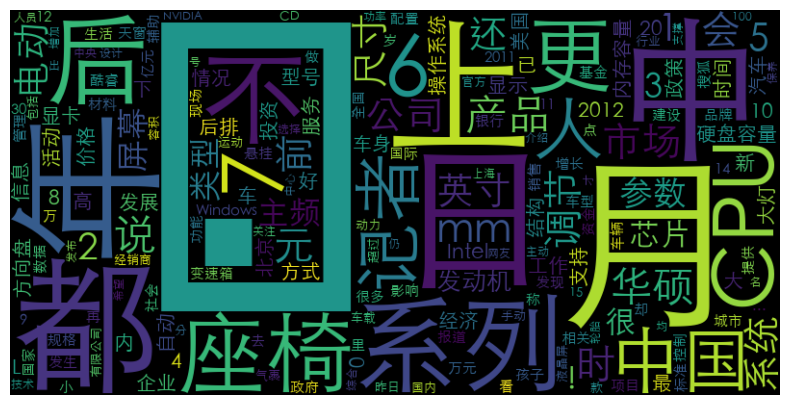

In [7]:
from wordcloud import WordCloud

font_path = '/System/Library/Fonts/STHeiti Light.ttc'  # PingFang SC 的路径

total = 0
filter_word_to_freq = {}
for i, row in df.iterrows():
    word = row['words']
    freq = row['freq']
    total += freq
    filter_word_to_freq[word] = freq
print(total)
wordcloud = WordCloud(
    font_path=font_path,  # 指定字体
    width=800, height=400).generate_from_frequencies(filter_word_to_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()